In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as PLT
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.applications.resnet import ResNet152, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Model,Input
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D,ZeroPadding2D, Dropout
from tensorflow.keras.utils import to_categorical
import os,glob,random,shutil
from pathlib import Path
from tensorflow.keras.optimizers.legacy import Adam
os.path.expanduser('/home/masoud/.keras/')

'/home/masoud/.keras/'

In [21]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
data_path = os.path.abspath(os.path.join('__file__', '../../../../datasets/15-Scene/data/'))
train_test_path = os.path.abspath(os.path.join('__file__', '../../../../datasets/15-Scene/train_test/'))
train_path = os.path.abspath(os.path.join(train_test_path, '../../../datasets/15-Scene/train_test/train/'))
test_path = os.path.abspath(os.path.join(train_test_path, '../../../datasets/15-Scene/train_test/test/'))

In [4]:
train_count = 100

if os.path.isdir(train_test_path):
    shutil.rmtree(train_test_path)
Path(f'{train_test_path}').mkdir(parents=True, exist_ok=True)

for category in os.listdir(data_path):
    images = glob.glob(f'{data_path}/{category}/*')
    random.shuffle(images)
    
    # train data
    Path(f'{train_path}/{category}/').mkdir(parents=True, exist_ok=True)
    
    for img in images[:train_count]:
        shutil.copyfile(img, f'{train_path}/{category}/{img.split("/")[-1]}')
        
    # test data
    Path(f'{test_path}/{category}/').mkdir(parents=True, exist_ok=True)
    for img in images[train_count:]:
        shutil.copyfile(img, f'{test_path}/{category}/{img.split("/")[-1]}')

In [5]:
image_generator = ImageDataGenerator(
    rescale=1.0/255.0
)
batch_size = 15

generator = image_generator.flow_from_directory(
    train_path,
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(150,150)
)

generator_test = image_generator.flow_from_directory(
    test_path,
    class_mode='categorical',
    batch_size=batch_size,
    target_size=(150,150)
)

Found 1500 images belonging to 15 classes.
Found 2985 images belonging to 15 classes.


# Default laerning rate 0.001

In [31]:
model = Sequential([
 
    
    Conv2D(128, 3, strides=1, activation='relu', padding='same'),
    MaxPool2D(pool_size=16, strides=2),
    
    Conv2D(64, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=8, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=4, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=200,
)

2023-02-24 16:15:14.493893: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8100
2023-02-24 16:15:14.932405: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 16:15:14.933139: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 16:15:14.933171: W tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:85] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-02-24 16:15:14.934050: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-24 16:15:14.934094: W tensorflow/compiler/xla/stream_executor/gpu/redzone_allocator.cc:318] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


Epoch 1/200


2023-02-24 16:15:15.580029: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


100/100 [==============================] - 7s 57ms/step - loss: 2.7027 - accuracy: 0.0687 - val_loss: 2.6492 - val_accuracy: 0.1028
Epoch 2/200
100/100 [==============================] - 5s 53ms/step - loss: 2.6762 - accuracy: 0.0933 - val_loss: 2.6430 - val_accuracy: 0.1477
Epoch 3/200
100/100 [==============================] - 5s 54ms/step - loss: 2.6139 - accuracy: 0.0960 - val_loss: 2.6575 - val_accuracy: 0.0968
Epoch 4/200
100/100 [==============================] - 5s 52ms/step - loss: 2.5383 - accuracy: 0.1380 - val_loss: 2.5441 - val_accuracy: 0.1732
Epoch 5/200
100/100 [==============================] - 5s 52ms/step - loss: 2.4887 - accuracy: 0.1533 - val_loss: 2.4463 - val_accuracy: 0.2161
Epoch 6/200
100/100 [==============================] - 5s 52ms/step - loss: 2.4554 - accuracy: 0.1693 - val_loss: 2.4218 - val_accuracy: 0.1886
Epoch 7/200
100/100 [==============================] - 5s 52ms/step - loss: 2.4120 - accuracy: 0.1800 - val_loss: 2.3244 - val_accuracy: 0.2489
Epoc

100/100 [==============================] - 5s 52ms/step - loss: 0.6770 - accuracy: 0.7573 - val_loss: 2.4490 - val_accuracy: 0.4707
Epoch 58/200
100/100 [==============================] - 5s 52ms/step - loss: 0.5866 - accuracy: 0.7860 - val_loss: 2.7349 - val_accuracy: 0.4580
Epoch 59/200
100/100 [==============================] - 5s 52ms/step - loss: 0.6779 - accuracy: 0.7527 - val_loss: 2.3739 - val_accuracy: 0.4563
Epoch 60/200
100/100 [==============================] - 5s 52ms/step - loss: 0.7130 - accuracy: 0.7567 - val_loss: 2.6988 - val_accuracy: 0.4265
Epoch 61/200
100/100 [==============================] - 5s 52ms/step - loss: 0.6654 - accuracy: 0.7580 - val_loss: 2.3439 - val_accuracy: 0.4680
Epoch 62/200
100/100 [==============================] - 5s 52ms/step - loss: 0.5399 - accuracy: 0.8080 - val_loss: 2.5105 - val_accuracy: 0.4720
Epoch 63/200
100/100 [==============================] - 5s 51ms/step - loss: 0.5666 - accuracy: 0.7900 - val_loss: 2.5836 - val_accuracy: 0.465

100/100 [==============================] - 5s 52ms/step - loss: 0.2492 - accuracy: 0.9007 - val_loss: 4.5451 - val_accuracy: 0.4576
Epoch 114/200
100/100 [==============================] - 5s 52ms/step - loss: 0.2496 - accuracy: 0.9113 - val_loss: 4.5345 - val_accuracy: 0.4519
Epoch 115/200
100/100 [==============================] - 5s 51ms/step - loss: 0.2182 - accuracy: 0.9227 - val_loss: 4.6013 - val_accuracy: 0.4469
Epoch 116/200
100/100 [==============================] - 5s 52ms/step - loss: 0.2750 - accuracy: 0.9040 - val_loss: 4.6215 - val_accuracy: 0.4586
Epoch 117/200
100/100 [==============================] - 5s 52ms/step - loss: 0.4521 - accuracy: 0.8613 - val_loss: 3.9819 - val_accuracy: 0.4539
Epoch 118/200
100/100 [==============================] - 5s 52ms/step - loss: 0.2869 - accuracy: 0.8987 - val_loss: 3.9498 - val_accuracy: 0.4503
Epoch 119/200
100/100 [==============================] - 5s 52ms/step - loss: 0.3043 - accuracy: 0.8960 - val_loss: 4.3413 - val_accuracy:

100/100 [==============================] - 5s 51ms/step - loss: 0.2432 - accuracy: 0.9160 - val_loss: 5.3905 - val_accuracy: 0.4382
Epoch 170/200
100/100 [==============================] - 5s 51ms/step - loss: 0.1613 - accuracy: 0.9393 - val_loss: 5.5200 - val_accuracy: 0.4576
Epoch 171/200
100/100 [==============================] - 5s 52ms/step - loss: 0.1745 - accuracy: 0.9367 - val_loss: 5.7500 - val_accuracy: 0.4466
Epoch 172/200
100/100 [==============================] - 5s 51ms/step - loss: 0.1195 - accuracy: 0.9600 - val_loss: 5.6481 - val_accuracy: 0.4586
Epoch 173/200
100/100 [==============================] - 5s 51ms/step - loss: 0.1090 - accuracy: 0.9600 - val_loss: 5.8273 - val_accuracy: 0.4526
Epoch 174/200
100/100 [==============================] - 5s 52ms/step - loss: 0.0979 - accuracy: 0.9580 - val_loss: 6.1229 - val_accuracy: 0.4553
Epoch 175/200
100/100 [==============================] - 5s 51ms/step - loss: 0.2385 - accuracy: 0.9213 - val_loss: 6.1230 - val_accuracy:

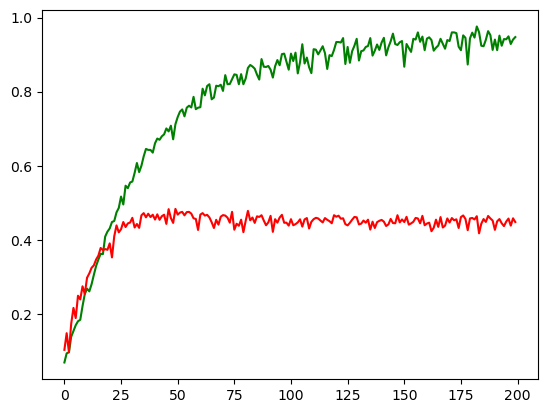

In [8]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

In [9]:
# model.save('15-scene')
# model = models.load_model('15-scene')

INFO:tensorflow:Assets written to: 15-scene/assets


INFO:tensorflow:Assets written to: 15-scene/assets


# Diffrent Learning rate

In [22]:
model = Sequential([
 
    
    Conv2D(128, 3, strides=1, activation='relu', padding='same'),
    MaxPool2D(pool_size=16, strides=2),
    
    Conv2D(64, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=8, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=4, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.compile(optimizer=Adam(learning_rate=0.03), loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=20,
)

Epoch 1/20
100/100 [==============================] - 5s 49ms/step - loss: 2.7196 - accuracy: 0.0620 - val_loss: 2.7103 - val_accuracy: 0.0633
Epoch 2/20
100/100 [==============================] - 5s 49ms/step - loss: 2.7215 - accuracy: 0.0580 - val_loss: 2.7092 - val_accuracy: 0.0764
Epoch 3/20
100/100 [==============================] - 5s 49ms/step - loss: 2.7150 - accuracy: 0.0567 - val_loss: 2.7251 - val_accuracy: 0.0472
Epoch 4/20
100/100 [==============================] - 5s 50ms/step - loss: 2.7194 - accuracy: 0.0647 - val_loss: 2.7119 - val_accuracy: 0.0764
Epoch 5/20
100/100 [==============================] - 5s 49ms/step - loss: 2.7182 - accuracy: 0.0587 - val_loss: 2.7111 - val_accuracy: 0.0369
Epoch 6/20
100/100 [==============================] - 5s 50ms/step - loss: 2.7164 - accuracy: 0.0620 - val_loss: 2.7143 - val_accuracy: 0.0536
Epoch 7/20
100/100 [==============================] - 5s 49ms/step - loss: 2.7199 - accuracy: 0.0580 - val_loss: 2.7134 - val_accuracy: 0.0720

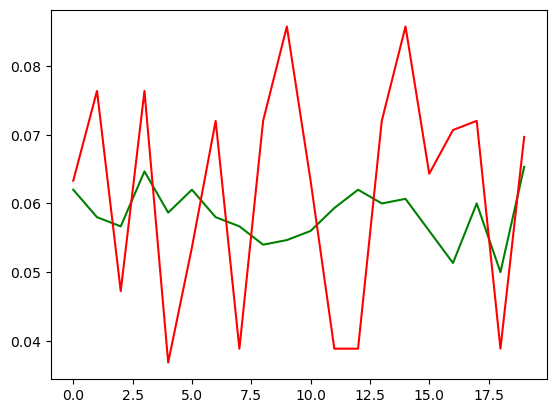

In [26]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

In [27]:
model = Sequential([
 
    
    Conv2D(128, 3, strides=1, activation='relu', padding='same'),
    MaxPool2D(pool_size=16, strides=2),
    
    Conv2D(64, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=8, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=4, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    
    
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(pool_size=2, strides=2),
    
    
    Flatten(),
    Dense(100, activation='relu'),
    Dropout(0.5),
    Dense(15, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
model.compile(optimizer=Adam(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
history = model.fit(
    generator,
    validation_data=generator_test,
    epochs=20,
)

Epoch 1/20
100/100 [==============================] - 6s 53ms/step - loss: 2.8442 - accuracy: 0.0573 - val_loss: 2.7128 - val_accuracy: 0.0472
Epoch 2/20
100/100 [==============================] - 5s 51ms/step - loss: 2.7137 - accuracy: 0.0613 - val_loss: 2.7100 - val_accuracy: 0.0764
Epoch 3/20
100/100 [==============================] - 5s 50ms/step - loss: 2.7126 - accuracy: 0.0560 - val_loss: 2.7099 - val_accuracy: 0.0764
Epoch 4/20
100/100 [==============================] - 5s 50ms/step - loss: 2.7123 - accuracy: 0.0587 - val_loss: 2.7059 - val_accuracy: 0.0385
Epoch 5/20
100/100 [==============================] - 5s 50ms/step - loss: 2.7126 - accuracy: 0.0593 - val_loss: 2.7066 - val_accuracy: 0.0871
Epoch 6/20
100/100 [==============================] - 5s 50ms/step - loss: 2.7115 - accuracy: 0.0573 - val_loss: 2.7096 - val_accuracy: 0.0369
Epoch 7/20
100/100 [==============================] - 5s 50ms/step - loss: 2.7115 - accuracy: 0.0493 - val_loss: 2.7076 - val_accuracy: 0.0369

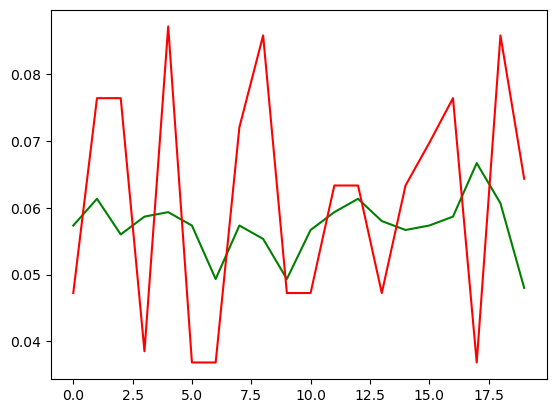

In [30]:
PLT.plot(history.history['accuracy'],color='green')
PLT.plot(history.history['val_accuracy'],color='red')

# ResNet Evaluation

In [11]:
resnet152 = ResNet152(weights='imagenet', input_shape=generator.image_shape, include_top=False)

In [12]:
resnet_model = models.Sequential()
resnet_model.add(resnet152)
resnet_model.add(Flatten())
resnet_model.add(Dense(15, activation='softmax'))
resnet_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
resnet_history = resnet_model.fit(
    generator,
    validation_data=generator_test,
    epochs=200,
)

Epoch 1/200


2023-02-24 16:32:45.111500: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-24 16:32:45.111519: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.29GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-24 16:32:45.125893: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.33GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-02-24 16:32:45.125903: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU

100/100 [==============================] - 35s 286ms/step - loss: 5.0965 - accuracy: 0.2933 - val_loss: 15.3343 - val_accuracy: 0.0871
Epoch 2/200
100/100 [==============================] - 27s 275ms/step - loss: 2.5241 - accuracy: 0.3953 - val_loss: 8.8056 - val_accuracy: 0.0871
Epoch 3/200
100/100 [==============================] - 27s 275ms/step - loss: 1.9531 - accuracy: 0.5087 - val_loss: 8.1912 - val_accuracy: 0.0871
Epoch 4/200
100/100 [==============================] - 28s 276ms/step - loss: 1.2991 - accuracy: 0.5787 - val_loss: 4.6219 - val_accuracy: 0.0918
Epoch 5/200
100/100 [==============================] - 27s 276ms/step - loss: 0.8427 - accuracy: 0.7313 - val_loss: 5.4089 - val_accuracy: 0.1072
Epoch 6/200
100/100 [==============================] - 27s 276ms/step - loss: 0.7130 - accuracy: 0.7627 - val_loss: 6.8246 - val_accuracy: 0.0760
Epoch 7/200
100/100 [==============================] - 28s 276ms/step - loss: 0.7540 - accuracy: 0.7780 - val_loss: 8.6847 - val_accura

Epoch 57/200
100/100 [==============================] - 27s 274ms/step - loss: 0.0978 - accuracy: 0.9653 - val_loss: 4.4676 - val_accuracy: 0.4060
Epoch 58/200
100/100 [==============================] - 27s 274ms/step - loss: 0.0933 - accuracy: 0.9660 - val_loss: 5.0910 - val_accuracy: 0.4101
Epoch 59/200
100/100 [==============================] - 27s 274ms/step - loss: 0.0893 - accuracy: 0.9720 - val_loss: 4.7282 - val_accuracy: 0.4054
Epoch 60/200
100/100 [==============================] - 27s 273ms/step - loss: 0.0795 - accuracy: 0.9760 - val_loss: 4.2936 - val_accuracy: 0.4807
Epoch 61/200
100/100 [==============================] - 27s 273ms/step - loss: 0.0687 - accuracy: 0.9807 - val_loss: 3.8980 - val_accuracy: 0.4546
Epoch 62/200
100/100 [==============================] - 27s 273ms/step - loss: 0.0826 - accuracy: 0.9720 - val_loss: 7.1187 - val_accuracy: 0.3424
Epoch 63/200
100/100 [==============================] - 27s 274ms/step - loss: 0.0685 - accuracy: 0.9773 - val_loss: 5

100/100 [==============================] - 27s 276ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 5.4355 - val_accuracy: 0.5045
Epoch 113/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0552 - accuracy: 0.9873 - val_loss: 6.7539 - val_accuracy: 0.4141
Epoch 114/200
100/100 [==============================] - 28s 277ms/step - loss: 0.0447 - accuracy: 0.9867 - val_loss: 5.5821 - val_accuracy: 0.4747
Epoch 115/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0503 - accuracy: 0.9847 - val_loss: 7.3989 - val_accuracy: 0.4405
Epoch 116/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0133 - accuracy: 0.9960 - val_loss: 5.2056 - val_accuracy: 0.5035
Epoch 117/200
100/100 [==============================] - 27s 276ms/step - loss: 0.0258 - accuracy: 0.9913 - val_loss: 14.4707 - val_accuracy: 0.2707
Epoch 118/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0184 - accuracy: 0.9927 - val_loss: 5.2541 

100/100 [==============================] - 27s 275ms/step - loss: 0.0185 - accuracy: 0.9967 - val_loss: 8.9931 - val_accuracy: 0.4436
Epoch 168/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0073 - accuracy: 0.9973 - val_loss: 6.5470 - val_accuracy: 0.5310
Epoch 169/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0038 - accuracy: 0.9980 - val_loss: 6.0462 - val_accuracy: 0.5457
Epoch 170/200
100/100 [==============================] - 27s 274ms/step - loss: 0.0203 - accuracy: 0.9953 - val_loss: 8.7512 - val_accuracy: 0.4606
Epoch 171/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0292 - accuracy: 0.9920 - val_loss: 9.0074 - val_accuracy: 0.4318
Epoch 172/200
100/100 [==============================] - 27s 274ms/step - loss: 0.0764 - accuracy: 0.9833 - val_loss: 9.4441 - val_accuracy: 0.4312
Epoch 173/200
100/100 [==============================] - 27s 275ms/step - loss: 0.0748 - accuracy: 0.9807 - val_loss: 10.3819 

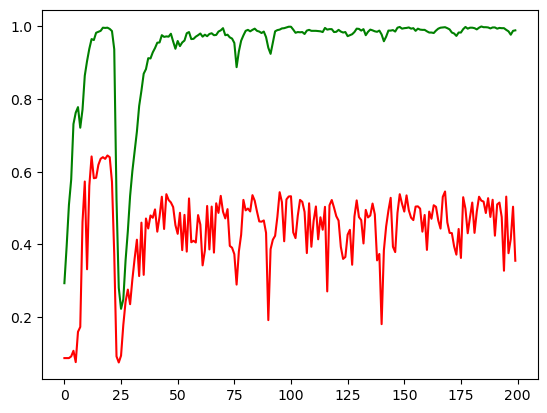

In [14]:
PLT.plot(resnet_history.history['accuracy'],color='green')
PLT.plot(resnet_history.history['val_accuracy'],color='red')